In [1]:
from sympy import *
from sympy.matrices import *
import mpmath
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
init_printing()

In [3]:
# theta, epsilon, u, T, L, l, Dw, Dv, g, a, b, c, m, I, x, y = symbols('theta epsilon u T L l D_w D_v g a b c m I x y')
theta, epsilon, u, mu, T, L, g, a, b, c, m, I, x, y = symbols('theta epsilon u mu T L g a b c m I x y')

In [4]:
def pseudo_abs(x):
    return sqrt(x**22 + epsilon) - sqrt(epsilon)

In [5]:
xdot = a
ydot = b
thetadot = c

# With drag
# adot = 1/m * (-sin(theta + u) * T + sin(phi) * v**2 * pseudo_abs(sin(theta - phi)) * Dv)
# bdot = 1/m * (cos(theta + u) * T - cos(phi) * v**2 * pseudo_abs(sin(theta - phi)) * Dv) - g
# cdot = 1/I * (sin(u) * T * L - pseudo_abs(c)*c * Dw + l*v**2 * sin(theta - phi) * Dv)

T = m*g - b
u = theta + thetadot - mu*a

# Without drag
adot = 1/m * (-sin(theta + u) * T)
bdot = 1/m * (cos(theta + u) * T) - g
cdot = 1/I * (sin(u) * T * L)

In [6]:
pprint(adot)
pprint(bdot)
pprint(cdot)

-(-b + g⋅m)⋅sin(-a⋅μ + c + 2⋅θ) 
────────────────────────────────
               m                
     (-b + g⋅m)⋅cos(-a⋅μ + c + 2⋅θ)
-g + ──────────────────────────────
                   m               
L⋅(-b + g⋅m)⋅sin(-a⋅μ + c + θ)
──────────────────────────────
              I               


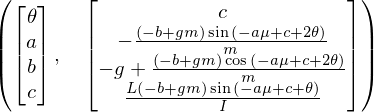

In [7]:
state_vec = Matrix([theta, a, b, c])
state_vec_dot = Matrix([thetadot, adot, bdot, cdot])
state_vec, state_vec_dot

\left[\begin{matrix}0 & 0 & 0 & 1\\- \frac{2 \left(- b + g m\right) \cos{\left (- a \mu + c + 2 \theta \right )}}{m} & \frac{\mu \left(- b + g m\right) \cos{\left (- a \mu + c + 2 \theta \right )}}{m} & \frac{\sin{\left (- a \mu + c + 2 \theta \right )}}{m} & - \frac{\left(- b + g m\right) \cos{\left (- a \mu + c + 2 \theta \right )}}{m}\\- \frac{2 \left(- b + g m\right) \sin{\left (- a \mu + c + 2 \theta \right )}}{m} & \frac{\mu \left(- b + g m\right) \sin{\left (- a \mu + c + 2 \theta \right )}}{m} & - \frac{\cos{\left (- a \mu + c + 2 \theta \right )}}{m} & - \frac{\left(- b + g m\right) \sin{\left (- a \mu + c + 2 \theta \right )}}{m}\\\frac{L \left(- b + g m\right) \cos{\left (- a \mu + c + \theta \right )}}{I} & - \frac{L \mu \left(- b + g m\right) \cos{\left (- a \mu + c + \theta \right )}}{I} & - \frac{L \sin{\left (- a \mu + c + \theta \right )}}{I} & \frac{L \left(- b + g m\right) \cos{\left (- a \mu + c + \theta \right )}}{I}\end{matrix}\right]


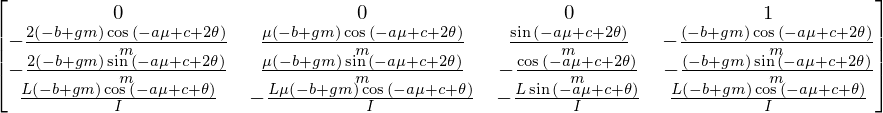

In [8]:
jac = state_vec_dot.jacobian(state_vec)
print(latex(jac))
jac

In [9]:
# print(latex(jac.eigenvals()))
# jac.eigenvals()

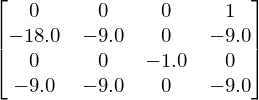

In [56]:
# drag parameters
l_real = 0.
Dv_real = 0.
Dw_real = 0.

# other params
L_real = -1
I_real = 1.
m_real = 1.
g_real = 10.
theta_real = 0
phi_real = 0.
a_real = 0.
b_real = 1.
c_real = 0.
mu_real = -1

# with drag
# jac_subs = jac.subs(L,L_real).subs(l,l_real).subs(Dv, Dv_real).subs(Dw, Dw_real).subs(I, I_real).subs(m,m_real).subs(g,g_real).subs(T, T_real).subs(theta, theta_real).subs(phi,phi_real).subs(epsilon, epsilon_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)

# without drag
jac_subs = jac.subs(L,L_real).subs(I, I_real).subs(m,m_real).subs(mu,mu_real).subs(g,g_real).subs(theta, theta_real).subs(a,a_real).subs(b,b_real).subs(c,c_real)
jac_subs_np = np.array(jac_subs,dtype=np.float64)
jac_subs

In [57]:
[evals, evecs] = np.linalg.eig(jac_subs_np)

In [58]:
np.set_printoptions(linewidth=200, suppress=True)
# print(evals, '\n')
# print(evecs)
print(np.real(evals))
print(np.imag(evals),'\n')
print(np.real(evecs))
print(np.imag(evecs))
#[print(vec) for vec in np.real(evecs)]

[-17.20314318  -2.60459864   1.80774182  -1.        ]
[0. 0. 0. 0.] 

[[-0.04169672  0.34283904  0.26423801  0.        ]
 [ 0.69550059  0.29169712 -0.83785782  0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.71731465 -0.89295811  0.4776741   0.        ]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
